In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
from scipy import stats
import re
import datetime
from scipy.interpolate import griddata
import xesmf as xe
%matplotlib inline

In [2]:
dir_in = '/p/scratch/cjibg36/kaandorp2/'

grid_dest = xr.load_dataset( os.path.join(dir_in,'TSMP/setup_clm_cordex_109x106/inputdata/griddata_cordex_109x106.nc') )
folder_data_in = os.path.join(dir_in, 'data/ERA5_BC/')
folder_data_out = os.path.join(dir_in, 'TSMP/setup_clm_cordex_109x106/atmforcings_nanocean/')


if not os.path.exists(folder_data_out):
    os.mkdir(folder_data_out)

In [10]:
# Interpolation method
method_interp = 'nearest'

# Variables: ERA5 names (in), and required CLM names (out) 
vars_in = ['Tair','PSurf','Qair','Rainf','SWdown','LWdown','Wind']
vars_out = ['TBOT','PSRF','QBOT','PRECTmms','FSDS','FLDS','WIND']

# Variables to copy from the CLM griddata file
vars_copy = ['LATIXY','LONGXY','LONE','LONW','LATS','LATN','EDGEE','EDGES','EDGEW','EDGEN']

# Years/months for which the data are available
years = ['2010']
months = ['%02d' % int_ for int_ in range(1,13)][0:1]

use_mask_out = True # True: keep NaN's in data; False: fill NaN's with interpolation

month_ = '01'
year_ = '2010'
v_in = vars_in[0]
v_out = vars_out[0]

In [11]:


data_out = grid_dest.copy()
data_out = data_out.drop_vars(['LANDMASK','AREA'])

# for i2,(v_in, v_out) in enumerate(zip(vars_in,vars_out)):
print(v_in,v_out)
filename = v_in + '*' + year_ + month_ + '*'
file_in = glob.glob(os.path.join( folder_data_in, filename))[0]

data_in = xr.load_dataset( file_in )

Tair TBOT


In [34]:
ds_out = xr.load_dataset( os.path.join(dir_in,'TSMP/setup_clm_cordex_109x106/inputdata/griddata_cordex_109x106.nc'), 
                         drop_variables=['LONE','LONW','LATS','LATN','EDGEE','EDGES','EDGEW','EDGEN','NUMLON','AREA','LANDMASK'])
ds_out['time'] = data_in['time'].copy()
ds_out = ds_out.rename({'LONGXY':'lon','LATIXY':'lat','lsmlat':'y','lsmlon':'x'})

In [36]:
data_in

<xarray.Dataset>
Dimensions:  (time: 744, lon: 720, lat: 360)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 ... 2010-01-31T23:00:00
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    Tair     (time, lat, lon) float32 244.5 244.5 244.5 244.5 ... nan nan nan
Attributes:
    title:        WATCH Forcing Data methodology applied to ERA5 data
    institution:  Copernicus Climate Change Service
    contact:      http://copernicus-support.ecmwf.int
    comment:      Methodology implementation for ERA5 and dataset production ...
    Conventions:  CF-1.7
    summary:      ERA5 data regridded to half degree regular lat-lon; Genuine...
    reference:    Cucchi et al., 2020, Earth Syst. Sci. Data, 12(3), 2097–212...
    licence:      The dataset is distributed under the Licence to Use Coperni...

In [44]:
regridder = xe.Regridder(data_in, ds_out, method="bilinear") #method="conservative_normed"

In [39]:
data_regridded = regridder(data_in)

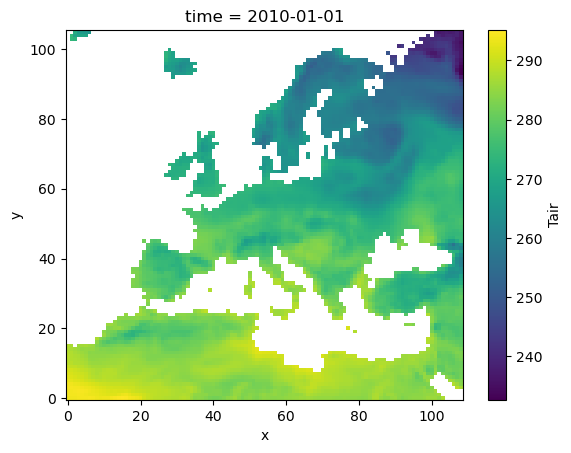

In [41]:
data_regridded.Tair[0].plot.pcolormesh()

In [45]:
grid_dest

<xarray.Dataset>
Dimensions:   (lsmlat: 106, lsmlon: 109, ncl2: 1, ncl3: 1, ncl4: 1, ncl5: 1)
Dimensions without coordinates: lsmlat, lsmlon, ncl2, ncl3, ncl4, ncl5
Data variables: (12/13)
    NUMLON    (lsmlat) float64 109.0 109.0 109.0 109.0 ... 109.0 109.0 109.0
    LONGXY    (lsmlat, lsmlon) float64 -10.27 -9.874 -9.476 ... 66.04 66.85
    LATIXY    (lsmlat, lsmlon) float64 21.43 21.59 21.75 ... 67.31 67.06 66.81
    LONE      (lsmlat, lsmlon) float64 -10.17 -9.771 -9.372 ... 66.52 67.33
    LATN      (lsmlat, lsmlon) float64 21.62 21.78 21.94 ... 67.38 67.13 66.87
    LONW      (lsmlat, lsmlon) float64 -10.42 -10.03 -9.632 ... 64.35 65.18 66.0
    ...        ...
    AREA      (lsmlat, lsmlon) float64 2.5e+03 2.5e+03 ... 2.5e+03 2.5e+03
    LANDMASK  (lsmlat, lsmlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    EDGEN     (ncl2) float64 67.73
    EDGEE     (ncl3) float64 37.53
    EDGES     (ncl4) float64 21.09
    EDGEW     (ncl5) float64 -10.43
Attributes:
    creation_date:  2023-02-15 17:45:40.231906
    Conventions:    None
    source_file:    jkeune, Coarsened by m.kaandorp
    title:          Synthetic Data for CLM3.5 on the CORDEX 0.11 domain, Coar...

In [48]:
grid_dest.LONW[0,:]

<xarray.DataArray 'LONW' (lsmlon: 109)>
array([-10.42270803, -10.02783775,  -9.63156891,  -9.23390961,
        -8.83486605,  -8.4344492 ,  -8.03266644,  -7.62952781,
        -7.22504306,  -6.81922269,  -6.4120779 ,  -6.00361967,
        -5.59386015,  -5.1828115 ,  -4.77048659,  -4.35689878,
        -3.94206214,  -3.52599037,  -3.10869896,  -2.69020271,
        -2.27051759,  -1.84965986,  -1.42764622,  -1.00449395,
        -0.58022073,  -0.15484477,   0.27161529,   0.69914031,
         1.12771064,   1.55730623,   1.98790658,   2.41949046,
         2.85203683,   3.28552365,   3.7199285 ,   4.15522861,
         4.5914011 ,   5.02842212,   5.46626735,   5.90491319,
         6.34433436,   6.78450608,   7.22540212,   7.66699719,
         8.10926485,   8.55217886,   8.9957118 ,   9.4398365 ,
         9.88452625,  10.32975245,  10.77548742,  11.2217021 ,
        11.66836882,  12.11545849,  12.56294155,  13.01078987,
        13.45897293,  13.90746212,  14.35622644,  14.80523729,
        15.25446367,  15.70387554,  16.15344334,  16.60313511,
        17.05292225,  17.50277424,  17.95265961,  18.40254784,
        18.85240841,  19.30221176,  19.75192642,  20.20152283,
        20.65097046,  21.10023785,  21.54929733,  21.99811554,
        22.44666481,  22.89491463,  23.34283543,  23.7903986 ,
        24.23757362,  24.68433094,  25.1306448 ,  25.57648277,
        26.02181721,  26.46662235,  26.91086864,  27.35452843,
        27.797575  ,  28.2399807 ,  28.68171978,  29.12276459,
        29.56309128,  30.00267315,  30.4414835 ,  30.87949944,
        31.31669617,  31.7530489 ,  32.18853569,  32.6231308 ,
        33.05681229,  33.48955727,  33.92134476,  34.35215569,
        34.78196526,  35.21075249,  35.63849831,  36.06518555,
        36.49078941])
Dimensions without coordinates: lsmlon
Attributes:
    units:      degrees_east
    long_name:  longitude of west edge

In [50]:
grid_dest.LONE[0,:] - grid_dest.LONW[0,:]

<xarray.DataArray (lsmlon: 109)>
array([0.25347185, 0.25655603, 0.25965071, 0.26275587, 0.26586866,
       0.26899195, 0.2721231 , 0.27526259, 0.27840924, 0.28156304,
       0.28472304, 0.28788924, 0.29106069, 0.29423738, 0.29741788,
       0.30060196, 0.30378938, 0.30697894, 0.31017077, 0.31336355,
       0.31655717, 0.31975061, 0.32294339, 0.32613489, 0.32932441,
       0.33251125, 0.33569474, 0.33887413, 0.34204882, 0.34521806,
       0.34838116, 0.35153747, 0.35468614, 0.35782647, 0.36095762,
       0.36407948, 0.36719036, 0.37029028, 0.37337828, 0.37645364,
       0.37951541, 0.38256311, 0.38559604, 0.38861299, 0.39161444,
       0.39459753, 0.39756346, 0.40051174, 0.40343904, 0.40634727,
       0.409235  , 0.41210175, 0.41494608, 0.417768  , 0.42056656,
       0.4233408 , 0.42609024, 0.42881441, 0.43151283, 0.43418455,
       0.43682909, 0.43944645, 0.44203472, 0.44459534, 0.44712639,
       0.44962597, 0.45209503, 0.45453453, 0.45694256, 0.45931816,
       0.46166134, 0.46397209, 0.46624851, 0.46849346, 0.47070217,
       0.47287846, 0.47501945, 0.47712517, 0.47919559, 0.48123074,
       0.48322964, 0.48519421, 0.48711967, 0.48901176, 0.49086571,
       0.49268341, 0.49446297, 0.49620628, 0.49791241, 0.49958229,
       0.50121403, 0.50280857, 0.50436592, 0.50588512, 0.50736904,
       0.50881481, 0.51022339, 0.51159382, 0.51292801, 0.51422501,
       0.51548767, 0.5167141 , 0.51790237, 0.51905441, 0.5201683 ,
       0.52124977, 0.522295  , 0.52330589, 0.52428246])
Dimensions without coordinates: lsmlon

In [52]:
grid = xr.load_dataset('/p/scratch/cjibg36/kaandorp2/TSMP/tsmp_eur11_eraint_eval_v2/input/clm/griddata_CLM_cordex0.11_436x424_cosmomask_varpft_noice.nc')

In [54]:
grid.LONW[0,:]

<xarray.DataArray 'LONW' (lsmlon: 436)>
array([-10.42270803, -10.32412195, -10.22544813, -10.12668657,
       -10.02783775,  -9.92890167,  -9.82987785,  -9.73076677,
        -9.63156891,  -9.53228426,  -9.43291283,  -9.33345461,
        -9.23390961,  -9.13427782,  -9.0345602 ,  -8.93475628,
        -8.83486605,  -8.73489046,  -8.63482904,  -8.5346818 ,
        -8.4344492 ,  -8.33413124,  -8.23372793,  -8.13323975,
        -8.03266644,  -7.9320085 ,  -7.83126616,  -7.73043919,
        -7.62952781,  -7.52853227,  -7.42745304,  -7.32628989,
        -7.22504306,  -7.12371278,  -7.02229905,  -6.92080235,
        -6.81922269,  -6.71756029,  -6.6158154 ,  -6.51398778,
        -6.4120779 ,  -6.31008601,  -6.2080121 ,  -6.10585666,
        -6.00361967,  -5.90130138,  -5.79890203,  -5.69642162,
        -5.59386015,  -5.49121833,  -5.38849616,  -5.28569365,
        -5.1828115 ,  -5.07984948,  -4.97680783,  -4.87368679,
        -4.77048659,  -4.66720748,  -4.56384969,  -4.46041346,
        -4.35689878,  -4.25330615,  -4.14963579,  -4.04588771,
        -3.94206214,  -3.83815944,  -3.73417974,  -3.63012326,
        -3.52599037,  -3.4217813 ,  -3.31749618,  -3.21313536,
        -3.10869896,  -3.00418723,  -2.89960051,  -2.79493892,
        -2.69020271,  -2.58539224,  -2.48050773,  -2.37554944,
...
        28.2399807 ,  28.35047913,  28.46093559,  28.57134914,
        28.68171978,  28.7920475 ,  28.90233135,  29.01257038,
        29.12276459,  29.23291492,  29.34301949,  29.45307827,
        29.56309128,  29.67305756,  29.7829771 ,  29.89284897,
        30.00267315,  30.11244869,  30.2221756 ,  30.33185387,
        30.4414835 ,  30.55106354,  30.66059303,  30.77007198,
        30.87949944,  30.98887634,  31.09820175,  31.20747471,
        31.31669617,  31.42586422,  31.53497887,  31.64404106,
        31.7530489 ,  31.86200237,  31.97090149,  32.07974625,
        32.18853569,  32.29726791,  32.40594482,  32.51456642,
        32.6231308 ,  32.73163795,  32.84008598,  32.94847679,
        33.05681229,  33.16508675,  33.27330208,  33.38146019,
        33.48955727,  33.59759521,  33.70557404,  33.81348991,
        33.92134476,  34.02914047,  34.13687515,  34.24454689,
        34.35215569,  34.45970154,  34.56718445,  34.67460632,
        34.78196526,  34.88925743,  34.99648666,  35.10365295,
        35.21075249,  35.31778717,  35.424757  ,  35.53166008,
        35.63849831,  35.74526978,  35.85197449,  35.95861435,
        36.06518555,  36.17168808,  36.27812386,  36.38449097,
        36.49078941,  36.5970211 ,  36.70318222,  36.80927277])
Dimensions without coordinates: lsmlon
Attributes:
    units:      degrees_east
    long_name:  longitude of west edge

In [66]:
assert ((grid.LONE[0,:-1] - grid.LONW[0,1:]) == 0).all(), 'All cell east borders should match with west' 
assert ((grid.LATN[:-1,0] - grid.LATS[1:,0]) == 0).all(), 'All cell north borders should match with south' 

In [60]:
((grid.LONE[0,:-1] - grid.LONW[0,1:]) == 0).all()

<xarray.DataArray ()>
array(True)

In [64]:
grid.LATN[0,:-1]

<xarray.DataArray 'LATN' (lsmlon: 435)>
array([21.19530392, 21.2357502 , 21.27606869, 21.31625652, 21.35631561,
       21.39624405, 21.43604279, 21.47570992, 21.51524734, 21.55465317,
       21.59392929, 21.63307381, 21.67208481, 21.71096611, 21.7497139 ,
       21.78833008, 21.8268137 , 21.8651638 , 21.9033823 , 21.94146633,
       21.9794178 , 22.01723576, 22.05491829, 22.09246826, 22.12988281,
       22.1671629 , 22.20430946, 22.24131966, 22.27819538, 22.31493473,
       22.35153866, 22.38800716, 22.42433834, 22.4605341 , 22.49659252,
       22.53251457, 22.56829929, 22.60394764, 22.63945675, 22.67482853,
       22.71006298, 22.74515915, 22.78011703, 22.81493664, 22.84961605,
       22.88415718, 22.91855907, 22.95281982, 22.98694324, 23.02092552,
       23.05476761, 23.08846951, 23.12203026, 23.15544987, 23.18872929,
       23.22186756, 23.25486279, 23.28771782, 23.32043076, 23.35300064,
       23.38542843, 23.41771412, 23.44985676, 23.4818573 , 23.51371384,
       23.54542637, 23.57699585, 23.60842133, 23.6397028 , 23.67084122,
       23.70183277, 23.73268127, 23.76338387, 23.79394245, 23.82435513,
       23.85462284, 23.88474464, 23.91472054, 23.94454956, 23.97423267,
       24.00376892, 24.03315926, 24.06240177, 24.09149837, 24.12044621,
       24.14924812, 24.17790127, 24.20640564, 24.23476315, 24.26297188,
       24.29103184, 24.31894398, 24.34670639, 24.37432003, 24.40178394,
       24.42909908, 24.4562645 , 24.48327923, 24.51014423, 24.53686047,
...
       26.3512392 , 26.33934116, 26.32727909, 26.31505394, 26.3026638 ,
       26.29011154, 26.27739429, 26.26451492, 26.25147057, 26.23826408,
       26.22489452, 26.21136284, 26.19766712, 26.18380833, 26.16978741,
       26.15560341, 26.14125729, 26.12674999, 26.11207867, 26.09724522,
       26.08225155, 26.06709385, 26.05177593, 26.03629589, 26.02065468,
       26.00485134, 25.98888779, 25.97276211, 25.9564743 , 25.94002724,
       25.923419  , 25.90665054, 25.88972092, 25.87263107, 25.85538101,
       25.83797073, 25.82040024, 25.80267048, 25.7847805 , 25.76673126,
       25.74852276, 25.73015404, 25.71162605, 25.69293976, 25.67409515,
       25.65509033, 25.63592815, 25.61660671, 25.59712696, 25.5774889 ,
       25.55769253, 25.53773975, 25.51762772, 25.49735928, 25.47693253,
       25.45634842, 25.43560791, 25.41471004, 25.39365578, 25.37244511,
       25.35107613, 25.3295517 , 25.30787277, 25.28603554, 25.26404381,
       25.24189568, 25.21959305, 25.19713306, 25.17451954, 25.15175056,
       25.1288271 , 25.10574818, 25.08251476, 25.05912781, 25.03558636,
       25.01189041, 24.98804092, 24.9640379 , 24.93988132, 24.91557121,
       24.89110756, 24.86649132, 24.84172249, 24.81680202, 24.79172802,
       24.76650143, 24.7411232 , 24.71559238, 24.68991089, 24.66407776,
       24.63809299, 24.61195755, 24.58566952, 24.55923176, 24.53264332,
       24.50590515, 24.4790163 , 24.45197773, 24.42478848, 24.39745045])
Dimensions without coordinates: lsmlon
Attributes:
    units:      degrees_north
    long_name:  latitude of north edge

In [65]:
grid.LATS[0,1:]

<xarray.DataArray 'LATS' (lsmlon: 435)>
array([21.13501358, 21.17526913, 21.21539593, 21.25539207, 21.29525948,
       21.33499622, 21.37460232, 21.41407871, 21.4534235 , 21.49263859,
       21.53172207, 21.57067299, 21.60949326, 21.64818096, 21.68673706,
       21.72515965, 21.76345062, 21.80160904, 21.83963299, 21.87752533,
       21.9152832 , 21.95290756, 21.99039745, 22.02775383, 22.06497478,
       22.10206223, 22.13901424, 22.17583084, 22.21251297, 22.24905777,
       22.2854681 , 22.32174206, 22.35788059, 22.3938818 , 22.42974567,
       22.46547413, 22.5010643 , 22.53651714, 22.57183266, 22.60700989,
       22.64204979, 22.67695141, 22.71171474, 22.74633789, 22.78082371,
       22.81517029, 22.84937572, 22.88344383, 22.9173708 , 22.95115852,
       22.98480511, 23.0183115 , 23.05167675, 23.08490181, 23.11798573,
       23.1509285 , 23.18372917, 23.2163887 , 23.24890518, 23.28128052,
       23.3135128 , 23.34560299, 23.37755013, 23.40935421, 23.44101524,
       23.47253323, 23.50390625, 23.53513622, 23.56622219, 23.5971632 ,
       23.62796021, 23.6586132 , 23.68912029, 23.71948242, 23.74970055,
       23.7797718 , 23.80969715, 23.83947659, 23.86911011, 23.89859772,
       23.92793846, 23.95713234, 23.98618031, 24.0150795 , 24.04383278,
       24.07243824, 24.10089493, 24.12920475, 24.1573658 , 24.18537903,
       24.21324348, 24.24095917, 24.26852608, 24.29594421, 24.32321262,
       24.35033131, 24.37730122, 24.40412045, 24.4307909 , 24.45730972,
...
       26.23012447, 26.21808434, 26.20588017, 26.19351292, 26.18098354,
       26.16828823, 26.1554327 , 26.14241219, 26.12922859, 26.11588287,
       26.10237503, 26.08870411, 26.07487011, 26.06087494, 26.04671574,
       26.03239536, 26.01791382, 26.0032692 , 25.98846245, 25.97349453,
       25.95836449, 25.94307327, 25.92762089, 25.91200733, 25.8962326 ,
       25.88029671, 25.86419964, 25.8479414 , 25.8315239 , 25.81494522,
       25.79820538, 25.78130627, 25.76424694, 25.7470274 , 25.72964764,
       25.71210766, 25.69440937, 25.67655182, 25.65853405, 25.64035702,
       25.62202072, 25.60352612, 25.58487225, 25.56606102, 25.54708958,
       25.52796078, 25.50867367, 25.48922825, 25.46962452, 25.44986248,
       25.42994404, 25.40986824, 25.38963509, 25.36924458, 25.34869576,
       25.32799244, 25.30713081, 25.28611279, 25.26493835, 25.24360752,
       25.22212029, 25.20047855, 25.17867947, 25.15672588, 25.13461685,
       25.11235237, 25.08993149, 25.06735706, 25.04462719, 25.02174377,
       24.99870491, 24.97551155, 24.95216465, 24.92866421, 24.90500832,
       24.88120079, 24.85723782, 24.83312321, 24.80885601, 24.78443432,
       24.75986004, 24.73513317, 24.71025562, 24.68522453, 24.66004086,
       24.63470554, 24.6092186 , 24.58358097, 24.55779266, 24.53185177,
       24.50576019, 24.47951698, 24.453125  , 24.42658138, 24.39988804,
       24.37304592, 24.34605217, 24.31890965, 24.29161739, 24.26417542])
Dimensions without coordinates: lsmlon
Attributes:
    units:      degrees_north
    long_name:  latitude of south edge